In [1]:
# Import packages
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pylab
import mahotas as mh
import cv2

In [2]:
from Functions import create_dirs, check_sky, mask_seg, count_animals,smooth_animals, get_bboxes,write_file, get_centers_through_borders

In [3]:
# Create the data directories
create_dirs()

Creation of the directory ../Data/images/2019-10 failed
Creation of the directory ../Data/labels/2019-10 failed
Creation of the directory ../Data/semantic/2019-10 failed


In [11]:
input_location = "../Data/images/2019-10/"
input_location_s = "../Data/semantic/2019-10/"
output_location = "../Data/labels/2019-10/"

bad_image_list = []

sigma = 2
minimum_animal_size = 20
date = "2019-10"

###----------###
IMG1000_175,250_.png
###----------###

This image contains 3 animals
Labeled blobs


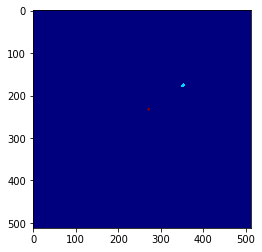

Smoothed animals


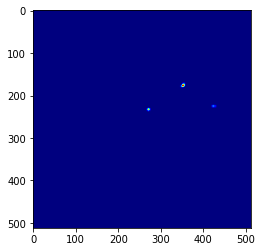

center locations: [(0.6875, 0.344482421875), (0.8251953125, 0.439453125), (0.5286649816176471, 0.45490579044117646)] 

bboxes: [(0.017578125, 0.017578125), (0.00390625, 0.001953125), (0.01171875, 0.013671875)] 

Proper animals found: writing file 

###----------###
IMG1001_200,250_.png
###----------###

This image contains 3 animals
Labeled blobs


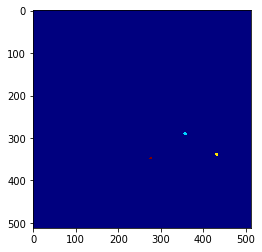

Smoothed animals


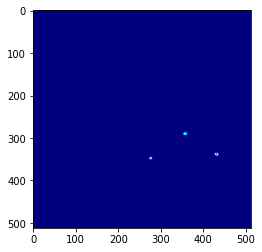

center locations: [(0.6971768465909091, 0.5662286931818182), (0.8408203125, 0.66015625), (0.5390625, 0.6793619791666666)] 

bboxes: [(0.017578125, 0.013671875), (0.015625, 0.013671875), (0.013671875, 0.01171875)] 

Proper animals found: writing file 

###----------###
IMG1002_225,250_.png
###----------###

This image contains 3 animals
Labeled blobs


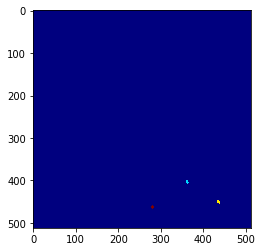

Smoothed animals


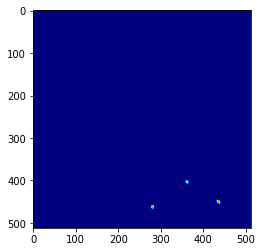

center locations: [(0.70634765625, 0.787890625), (0.8500390625, 0.8785546875), (0.5481305803571429, 0.9029482886904762)] 

bboxes: [(0.013671875, 0.015625), (0.017578125, 0.017578125), (0.01171875, 0.015625)] 

Proper animals found: writing file 

###----------###
IMG1003_250,250_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG1004_275,250_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG1005_300,250_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG1006_325,250_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG1007_350,250_.png
###----------###

This image contains 0 animals
Zero animals in this p

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG109_-800,-900_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG10_-175,225_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG110_-800,-925_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG111_-775,-950_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG112_-750,-975_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG113_-725,-1000_.png
###----------###

This image contains 0 animals

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG157_375,-1075_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG158_400,-1075_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG159_425,-1075_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG15_-175,350_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG160_450,-1075_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG161_475,-1075_.png
###----------###

This image contains 0 animals


This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG205_1225,-900_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG206_1200,-875_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG207_1175,-850_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG208_1150,-825_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG209_1125,-825_.png
###----------###

This image contains 0 animals
Zero animals in this picture, not adding file information to labels file 

###----------###
IMG20_-175,475_.png
###----------###

This image contains 0 animals


KeyboardInterrupt: 

In [12]:
with open("../Data/labels/00_SPLIT.txt","w") as file: 
    for image_name in os.listdir("../Data/semantic/" + date):

        # Input image from directory
        print("###----------###" + "\n" + image_name + "\n" + "###----------###" + "\n")
        
        input_location_s = "../Data/semantic/" + date
        input_image_s = input_location_s + image_name
        
        # If image contains sky, i.e. it's under the ground level, continue, else, write the file to the 00_SPLIT file
        if check_sky(input_image_s) == True:
            print("Warning, image contains sky. Removing from set.")
            bad_image_list.append(image_name)
            continue
        else:
            file.write(date + "/" + image_name + ' ' + "1") # The 1 refers to whether this is for training, test, or dev
            file.write("\n")
                    
        # Mask everything but animals in image
        animals, mask = mask_seg(input_image_s)

        # Smooth animals with gaussian and remove tiny animals less than set size
        animals_smooth = smooth_animals(animals, sigma = sigma,minimal_size = minimum_animal_size)

        # Count animals, if no animals are present, skip image
        labeled_animals, nr_objects = count_animals(animals_smooth)
        if nr_objects == 0:
            print("Zero animals in this picture, not adding file information to labels file", "\n")
            continue
        
        # Get centers of animals using boundaries
        centers_list = get_centers_through_borders(labeled_animals, nr_objects)
        
        # Get bboxes of animals in image
        #centers_list = get_centers(animals_smooth,clean_distance = clean_distance) # old
        bbox_list = get_bboxes(labeled_animals)

        # Output centers and bboxes
        write_file(output_location,image_name,centers_list,bbox_list)
        

In [ ]:

# Turn on to delete images that have innapropriate compositions in them

print(bad_image_list)
for image in bad_image_list:
    os.remove("../Data/images/2019-10/" + image)
    os.remove("../Data/semantic/2019-10/" + image)
